In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
plt.style.use('ggplot')


In [2]:
%%capture
BisectionResult = namedtuple('BisectionResult', ['result', 'possible_error', 'res','iterations', 'iteration_list'], verbose=True)
def bisection(f, left, right, max_iterations=200, tol=1e-12):
    iterations = 0
    new = None
    iteration_list = []
    while ((right - left) / 2) > tol and iterations < max_iterations:
        iterations+=1
        new = (left+right)/2
        iteration_list.append(new)
        if f(new)*f(left) > 0:
            left=new
        elif f(new)*f(right) > 0:
            right=new
        else: break
    possible_error=(right-left)/2
    return BisectionResult(new, possible_error, f(new),iterations, np.array(iteration_list))

In [3]:
#f = lambda k: (10+1/(2*k))*np.e**(-k)-7-1/(2*k)
f = lambda k: -(10+1/(2*k))*np.e**(-k)+7+1/(2*k)

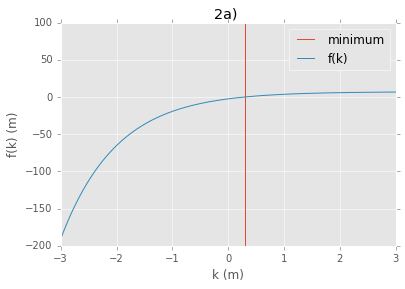

In [4]:
xs = np.linspace(-3,3,1000)
ys = f(xs)

bisect_result = bisection(f, -1,2)

plt.plot((bisect_result.result,bisect_result.result), (-200, 100), label="minimum")
plt.plot(xs,ys, label="f(k)")

plt.title("2a) ")
plt.xlabel("k (m)")
plt.ylabel("f(k) (m)")
plt.legend()
plt.show()

BisectionResult(result=1.7320508075692942, possible_error=5.684341886080801e-13, res=1.4441781104324036e-12, iterations=43, iteration_list=array([ 5.        ,  2.5       ,  1.25      ,  1.875     ,  1.5625    ,
        1.71875   ,  1.796875  ,  1.7578125 ,  1.73828125,  1.72851562,
        1.73339844,  1.73095703,  1.73217773,  1.73156738,  1.73187256,
        1.73202515,  1.73210144,  1.73206329,  1.73204422,  1.73205376,
        1.73204899,  1.73205137,  1.73205018,  1.73205078,  1.73205107,
        1.73205093,  1.73205085,  1.73205081,  1.7320508 ,  1.7320508 ,
        1.73205081,  1.73205081,  1.73205081,  1.73205081,  1.73205081,
        1.73205081,  1.73205081,  1.73205081,  1.73205081,  1.73205081,
        1.73205081,  1.73205081,  1.73205081]))

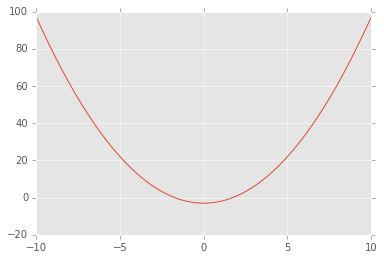

In [5]:
x2 = lambda x: x**2 - 3

points = np.linspace(-10,10, 1000)
plt.plot(points, x2(points))
bisection(x2, 0, 10)

In [6]:
f_fix = lambda k: k/7*(10+1/(2*k))*np.e**(-k)-1/14

In [7]:
%%capture
FixedPointResult = namedtuple('FixedPointResult', ['result', 'iterations', 'iteration_list'], verbose=True)
def fixed_point(f, start, tol=1e-12,max_iterations=100):
    previous = start
    current = f(previous)
    iterations = 0
    iteration_list = []
    while np.abs(current - previous) > tol and iterations < max_iterations:
        iterations += 1
        previous = current
        current=f(current)
        iteration_list.append(current)
    return FixedPointResult(current, iterations, np.array(iteration_list))

FixedPointResult(result=0.29670305321659407, iterations=68, iteration_list=array([ 0.39724103,  0.35803271,  0.3360505 ,  0.32266668,  0.31412983,
        0.30852748,  0.30478341,  0.30225113,  0.30052468,  0.29934123,
        0.29852699,  0.29796535,  0.29757728,  0.29730881,  0.29712293,
        0.29699416,  0.29690491,  0.29684304,  0.29680014,  0.29677039,
        0.29674976,  0.29673545,  0.29672553,  0.29671864,  0.29671387,
        0.29671055,  0.29670826,  0.29670666,  0.29670556,  0.29670479,
        0.29670426,  0.29670389,  0.29670363,  0.29670346,  0.29670333,
        0.29670325,  0.29670319,  0.29670315,  0.29670312,  0.2967031 ,
        0.29670308,  0.29670307,  0.29670307,  0.29670306,  0.29670306,
        0.29670306,  0.29670306,  0.29670306,  0.29670305,  0.29670305,
        0.29670305,  0.29670305,  0.29670305,  0.29670305,  0.29670305,
        0.29670305,  0.29670305,  0.29670305,  0.29670305,  0.29670305,
        0.29670305,  0.29670305,  0.29670305,  0.29670305,  0

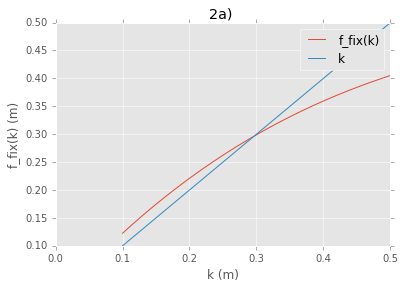

In [8]:
xs = np.linspace(0.10,0.5,1000)
ys = f_fix(xs)

point = fixed_point(f_fix, 1)
print(point)

plt.plot(xs,ys, label="f_fix(k)")
plt.plot(xs,xs, label="k")

#plt.plot((point,point), (plt.ylim(0), plt.ylim(1)), label="fixed point")

plt.title("2a) ")
plt.xlabel("k (m)")
plt.ylabel("f_fix(k) (m)")
plt.xlim(0,0.5)
plt.legend()
plt.show()

In [9]:
def times(f, start, n):
    current = f(start)
    while n > 0:
        current = f(current)
        print(current)
        n-=1
    return current
#times(f_fix, 10, 10)



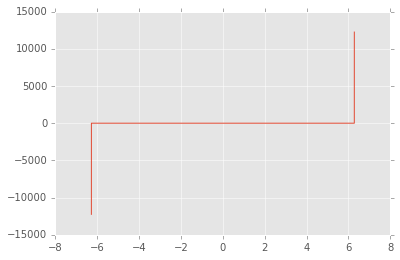

In [10]:
h = 3e-12
x = np.linspace(-2*np.pi, 2*np.pi, 10000)
y = (-np.sin(x+h)+np.sin(x))/np.sin(x)
plt.plot(x,y)
plt.show()

In [11]:
def next(p):
    return p - (p-np.sin(p)-1)/(np.sin(p) + p*np.cos(p))
    
times(next, 0.5, 1)

1.99720539501


1.9972053950136814

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log


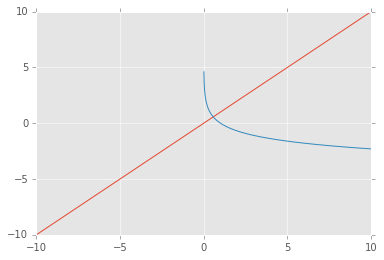

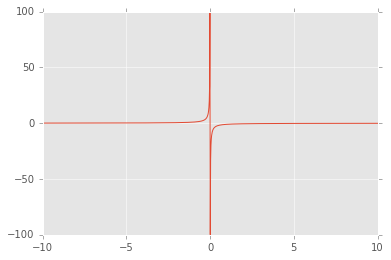

In [12]:
# 10
f = lambda x: x * np.log(x)
x = np.linspace(-10, 10, 1000)
y1 = x
y2 = -np.log(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()
gprime = lambda x: -1/x
plt.plot(x, gprime(x))
plt.show()

In [13]:
def derive(f, h=1e-12):
    def derived(x):
        return (f(x+h)-f(x))/h
    return derived


def newton(f, fprime, start, tol=1e-12):
    def g(x):
        return x - f(x)/fprime(x)
    return fixed_point(g, start, tol=tol)

def secant(f, start, tol=1e-12):
    return newton(f, derive(f), start, tol=tol)

In [14]:
# Task 6
k=0.29670305
time_of_death = lambda t: 22 -37 + 0.5*t-1/(2*k) + (10 + 1/(2*k))*np.e**(-k*t)
derivative_of_death = lambda t: 0.5 + -k*(10 + 1/(2*k))*np.e**(-k*t)

newton(time_of_death, derivative_of_death, 5)
secant(time_of_death, 5)

FixedPointResult(result=-1.3324871338230972, iterations=17, iteration_list=array([-31.96056935, -28.59015488, -25.22024972, -21.84284515,
       -18.47190207, -15.12932668, -11.83152524,  -8.64029684,
        -5.70382579,  -3.30790429,  -1.84039634,  -1.37190716,
        -1.33275868,  -1.33248684,  -1.33248713,  -1.33248713,  -1.33248713]))

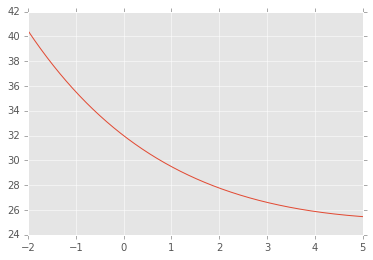

-0.00040501157656080977

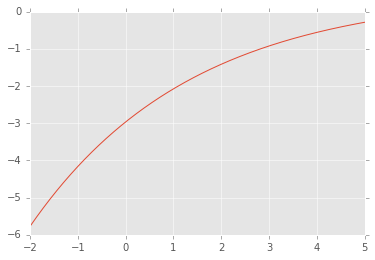

In [15]:
x = np.linspace(-2,5,1000)
plt.plot(x, time_of_death(x)+37)
plt.show()
plt.plot(x, derivative_of_death(x))
time_of_death(-1.3324)

In [16]:
fixed_point(lambda t: time_of_death(t)+t, 1)

FixedPointResult(result=5.579265880707039e+18, iterations=100, iteration_list=array([  5.39549713e+01,   6.42472717e+01,   7.96857210e+01,
         1.02843395e+02,   1.37579906e+02,   1.89684672e+02,
         2.67841822e+02,   3.85077546e+02,   5.60931132e+02,
         8.24711511e+02,   1.22038208e+03,   1.81388793e+03,
         2.70414671e+03,   4.03953488e+03,   6.04261714e+03,
         9.04724052e+03,   1.35541756e+04,   2.03145782e+04,
         3.04551821e+04,   4.56660880e+04,   6.84824468e+04,
         1.02706985e+05,   1.54043792e+05,   2.31049003e+05,
         3.46556820e+05,   5.19818545e+05,   7.79711132e+05,
         1.16955001e+06,   1.75430833e+06,   2.63144582e+06,
         3.94715204e+06,   5.92071137e+06,   8.88105037e+06,
         1.33215589e+07,   1.99823216e+07,   2.99734658e+07,
         4.49601819e+07,   6.74402562e+07,   1.01160368e+08,
         1.51740535e+08,   2.27610786e+08,   3.41416162e+08,
         5.12124226e+08,   7.68186322e+08,   1.15227947e+09,
       

In [66]:
def plot_convergence(result):
    errors = np.abs(result.result - result.iteration_list)
    changes = np.array([errors[i]/errors[i-1] for i in range(1, len(errors))])
    x = range(0, len(changes))
    plt.scatter(x, changes)
    print(changes)
    #plt.plot(x, np.poly1d(np.polyfit(x, changes, 1))(x))
    plt.show()
    
def plot_quadratic_convergence(result):
    errors = np.abs(result.result - result.iteration_list)
    changes = np.array([errors[i]/(errors[i-1]**2) for i in range(1, len(errors))])
    x = range(0, len(changes))
    plt.scatter(x, changes)
    print(changes)
    #plt.plot(x, np.poly1d(np.polyfit(x, changes, 1))(x))
    plt.show()

In [18]:
print("newton: ", newton(lambda x: x+np.log(x), lambda x: 1 + 1/x, 0.5))
print("secant: " , secant(lambda x: x+np.log(x), 0.5))

newton:  FixedPointResult(result=0.56714329040978384, iterations=4, iteration_list=array([ 0.56713899,  0.56714329,  0.56714329,  0.56714329]))
secant:  FixedPointResult(result=0.56714329040978384, iterations=4, iteration_list=array([ 0.56713905,  0.56714329,  0.56714329,  0.56714329]))


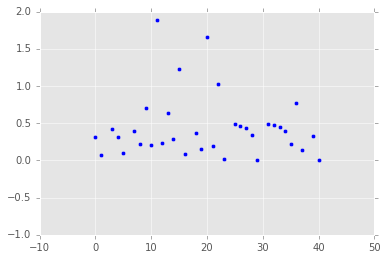

In [49]:
result = bisection(time_of_death, -2,3)
plt.ylim(-1,2)
plot_convergence(result)

[ 0.09718244  0.09712688  0.09712148  0.09712096  0.0971209   0.09712083
  0.09712015  0.09711317  0.09704161  0.09630229  0.08848228  0.        ]


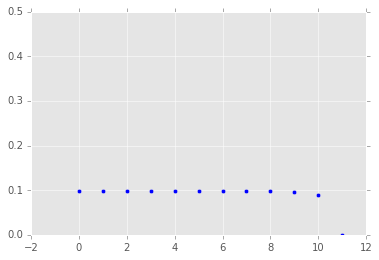

In [113]:
# Fixed point
# Just adding +t to both sides doesn't converge, but this 
def best_fixed_g(t):
    return np.log(1+(5-0.5*t)/(10+(1/(2*k))))/(-k)

result = fixed_point(best_fixed_g, 3)
plt.ylim(0,0.5)
plot_convergence(result)

FixedPointResult(result=-1.3324871338230981, iterations=8, iteration_list=array([-5.35953736, -3.06036045, -1.7317157 , -1.35737221, -1.33258855,
       -1.33248714, -1.33248713, -1.33248713]))
[  4.29066740e-01   2.31051990e-01   6.23328948e-02   4.07558159e-03
   1.66642205e-05   9.19654636e-07   0.00000000e+00]


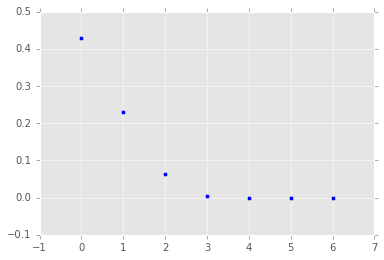

[  1.06546161e-01   1.33720446e-01   1.56133353e-01   1.63776160e-01
   1.64307166e-01   5.44140765e+02   0.00000000e+00]


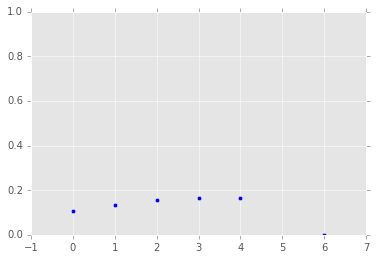

In [71]:
# Newton
result = newton(time_of_death, derivative_of_death, 3)
print(result)
#plt.ylim(0,0.5)
plot_convergence(result)
plt.ylim(0,1)
plot_quadratic_convergence(result)

In [116]:
def plot_iterations(x, f, **kwargs):
    y = [f(start).iterations for start in x]
    plt.scatter(x,y, **kwargs)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in log


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

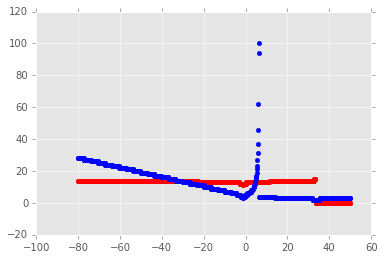

In [115]:
x = np.linspace(-80, 50, 1000)
plot_iterations(x, lambda start: fixed_point(best_fixed_g, start),color='r' )
plot_iterations(x, lambda start: newton(time_of_death, derivative_of_death, start),color='b')
#plot_iterations(x, lambda start: bisection(time_of_death, -start, start),color='g')
plt.show()

In [120]:
from scipy.optimize import fsolve

result, infodict, ier, mesg = fsolve(time_of_death, 3, full_output=True)
print(result)
print(infodict)
#plt.ylim(0,0.5)
#errors = np.abs(result.result - result.iteration_list)
#changes = np.array([errors[i]/errors[i-1] for i in range(1, len(errors))])
#x = range(0, len(changes))
#plt.scatter(x, changes)
#print(changes)
#plt.plot(x, np.poly1d(np.polyfit(x, changes, 1))(x))
#plt.show()

[-1.33248713]
{'fjac': array([[-1.]]), 'nfev': 12, 'qtf': array([  6.07466433e-09]), 'r': array([ 4.64822688]), 'fvec': array([ -1.06581410e-14])}
